In [2]:
!pip -q install pythainlp

     |████████████████████████████████| 11.0MB 22.6MB/s 
     |████████████████████████████████| 747kB 30.7MB/s 


In [4]:
!pip -q install transformers

     |████████████████████████████████| 2.3MB 22.6MB/s 
     |████████████████████████████████| 3.3MB 38.6MB/s 
     |████████████████████████████████| 901kB 48.1MB/s 


In [7]:
! git clone https://github.com/PyThaiNLP/wisesight-sentiment.git

Cloning into 'wisesight-sentiment'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 213 (delta 31), reused 18 (delta 5), pack-reused 147
Receiving objects: 100% (213/213), 11.11 MiB | 24.15 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [58]:
import pandas as pd
import re

In [30]:
def create_dataframe(dataset):
  #dataset text/label path
  main_path = "/content/wisesight-sentiment/kaggle-competition/"
  dataset_text_path = main_path + dataset + ".txt"
  dataset_label_path = main_path + dataset + "_label.txt"

  #open dataset text/label file
  dataset_text = open(dataset_text_path, encoding= "utf-8", errors= "ignore").read().split("\n")
  dataset_label = open(dataset_label_path, encoding= "utf-8", errors= "ignore").read().split("\n")
  
  #create dataset dataframe for combining text and label
  dataset_dataframe = pd.DataFrame(data=zip(dataset_text, dataset_label), columns=["text", "label"])
  return dataset_dataframe

In [49]:
#Create train/test dataframe
train_dataframe = create_dataframe("train")
test_dataframe = create_dataframe("test")

In [50]:
#Delete blank space data in dataframe
train_dataframe = train_dataframe[(train_dataframe["text"] != "") |(train_dataframe["label"] != "") ]
test_dataframe = test_dataframe[(test_dataframe["text"] != "") | (test_dataframe["label"] != "")]

In [56]:
train_dataframe

,text,label
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu
1,คะ,neu
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg
3,😅😅😅,neu
4,สวัสดีวันพุธ แนน อะไรนะ,neu
...,...,...
24058,แม่งควายล้วนนน,neg
24059,ดอยสุเทพน้องง ไปหมดแล้วววว #pm25,neg
24060,ค่าชุดอาจจะแพงกว่าส่วนลด,neg
24061,รัฐต้องการแค่ภาษีครับ,neu


In [57]:
test_dataframe

,text,label
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,neg
1,ครับ #phithanbkk,neu
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,neg
3,Cf clarins 5 ขวด 2850,neu
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,neu
...,...,...
2669,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...,pos
2670,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,neu
2671,ไปเถอะดอม,pos
2672,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,neu


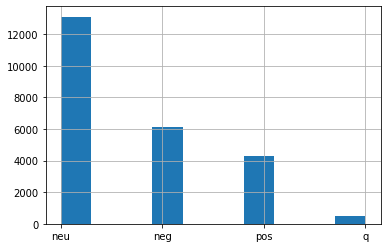

In [63]:
#Visulize the number of label in dataset 
train_dataframe["label"].hist()

In [67]:
#print the exact number of label
label_list = ["q", "neu", "neg", "pos"]
for label in label_list:
  _num_label = len(train_dataframe[train_dataframe["label"] == label])
  print(label,":", _num_label )

q : 518
neu : 13105
neg : 6140
pos : 4300
